In [20]:
import numpy as np
import utils
import plotting_tools as pt
from scipy.interpolate import griddata

In [33]:
Nx, Ny, Nz = 256, 1, 256
et = 86400.0*10.0
N = 1

def load(Nx,Ny,Nz,et):
    N = 1
    base_fn = 'output_swe'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,Nz,et)

864000


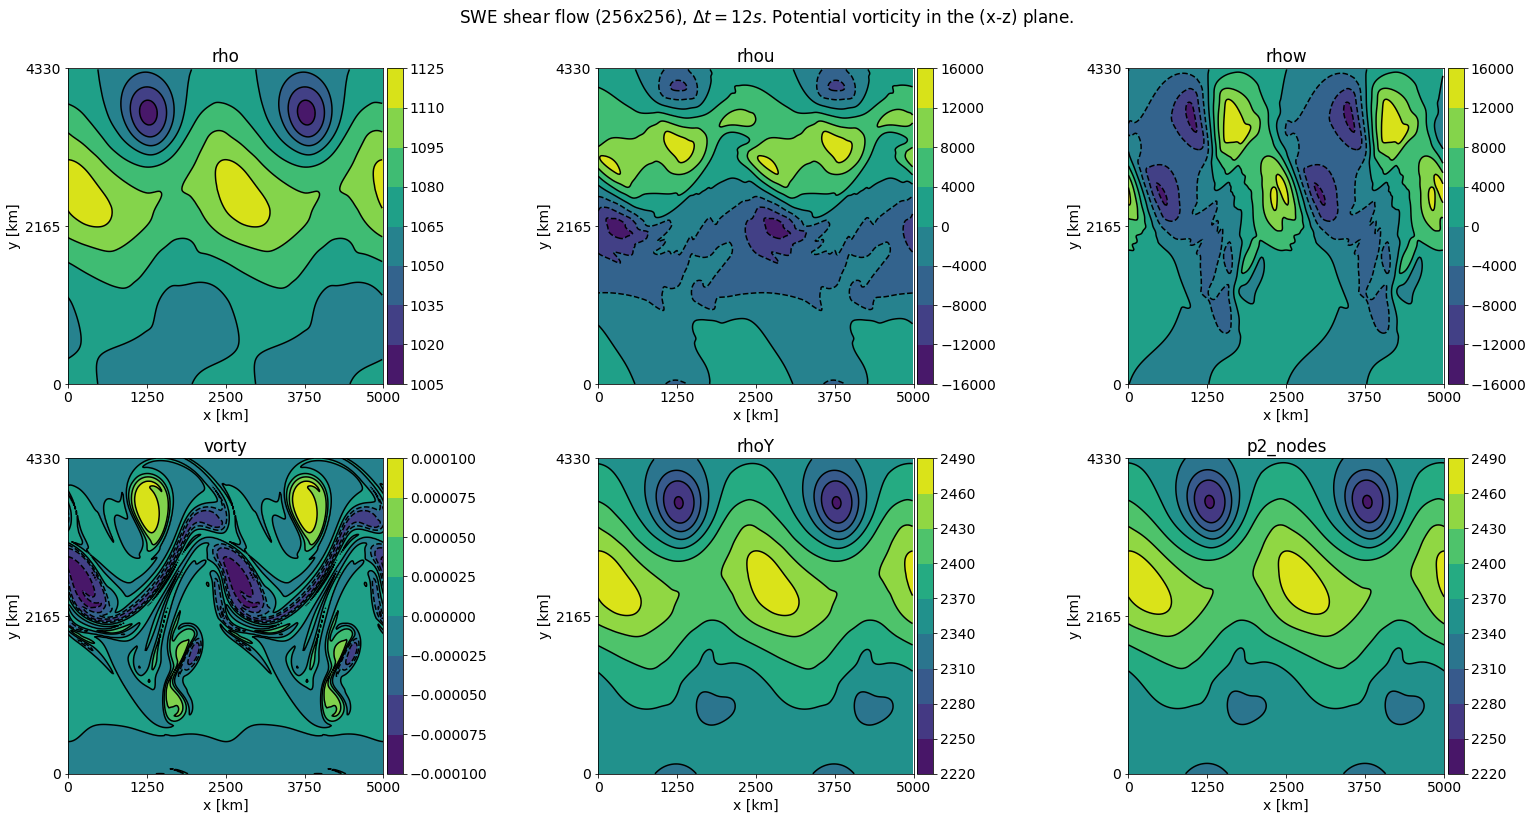

In [53]:
comp_sfx = 'icshear_3D'
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)

attributes = ['rho','rhou','rhow','vorty','rhoY','p2_nodes']

t_lbl = 'TIME'
slc = 0

times = [864000]
tag = tags[9]

arr_lst = []

for tt,time in enumerate(times):
    print(time)
    for atr_idx, attribute in enumerate(attributes):
        
        arr = tc.get_arr(path, time, N, attribute, label_type=t_lbl, tag=tag, inner=True, avg=False)[0][:,slc,:]
        arr = arr.T
        
        arr_lst.append([arr,attribute])
        
        arr = [arr,attribute]

pl = pt.plotter(arr_lst,ncols=3,figsize=(22,12),sharey=False)
# lvls = np.arange(-0.45,1.7,0.1)
lvls = np.arange(-11.0,11.1,2)
# lvls = np.arange(H-60,H+42,2)
x_axs = [0,1250,2500,3750,5000]
y_axs = [0,2165,4330]
x_loc = np.linspace(0,Nx,5)
y_loc = np.linspace(0,Nz,3)
x_label = r'x [km]'
y_label = r'y [km]'
st = 'SWE shear flow (%ix%i), $\Delta t = 12s$. Potential vorticity in the (x-z) plane.' %(Nx,Nz)

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(aspect='equal',method='contour',suptitle=st)

0
1
2
3
4
5


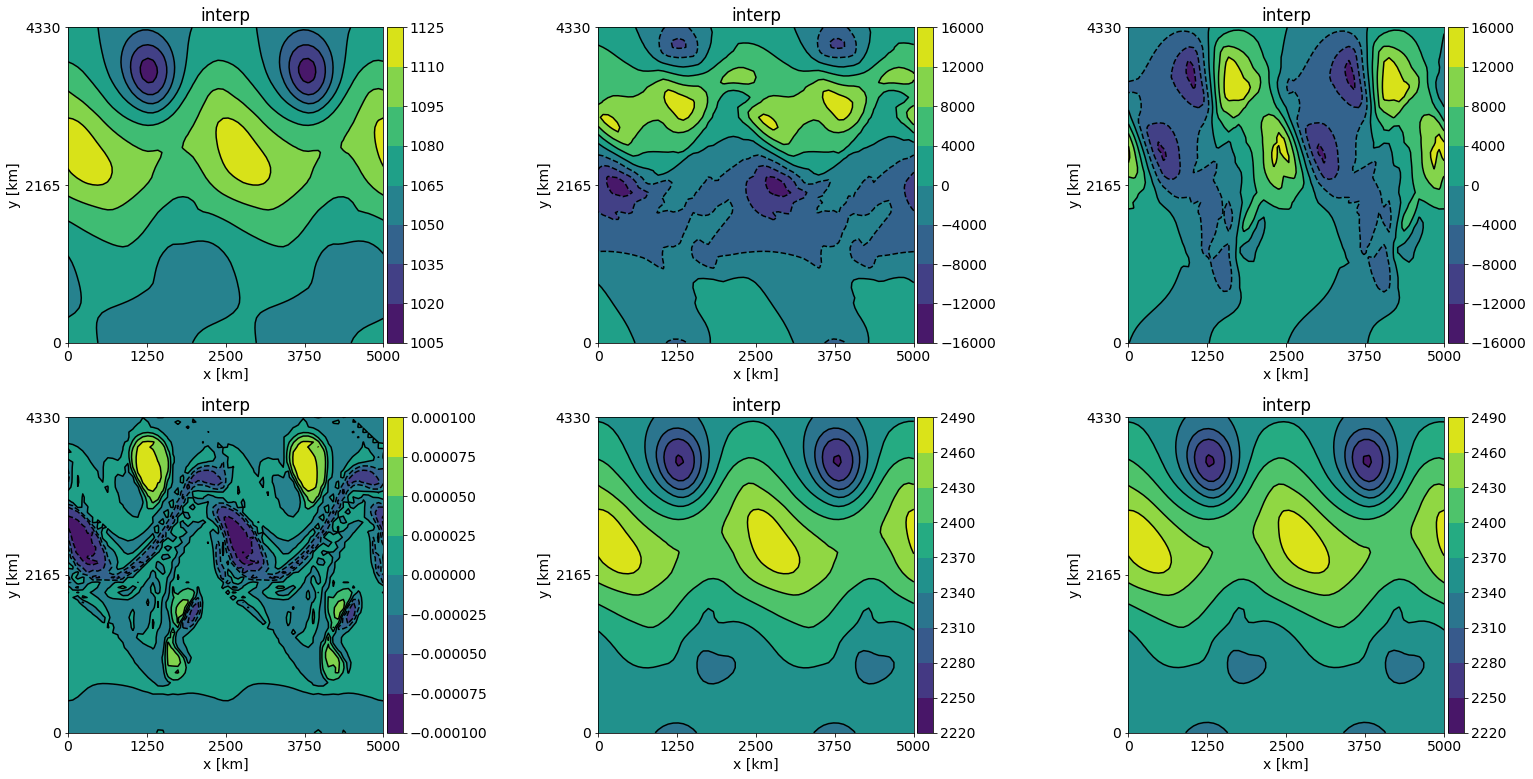

In [64]:
arr_lst_interp = []

nNx, nNz = 64, 64
Lx, Lz = 5000.0, 4330.0

grid_x, grid_z = np.meshgrid(np.linspace(0,Lx,nNx), np.linspace(0,Lz,nNz))

for attr in range(len(attributes)):
    print(attr)
    arr = arr_lst[attr][0]
    
    gNx, gNz = arr.shape[0], arr.shape[1]
    x, z = np.linspace(0,Lx,gNx), np.linspace(0,Lz,gNz)
    X,Z = np.meshgrid(x,z)
    
    points = np.zeros((np.zeros((gNx,gNz)).flatten().shape[0],2))
    points[:,0] = X[...].flatten()
    points[:,1] = Z[...].flatten()
    
    values = (arr).flatten()

    arr_interp = griddata(points, values, (grid_x, grid_z), method='cubic')
    arr_interp = arr_interp.reshape(nNx,nNz)

    arr_interp = [arr_interp,'interp']
    arr_lst_interp.append(arr_interp)

pl = pt.plotter(arr_lst_interp,ncols=3,figsize=(22,12))

x_axs = [0,1250,2500,3750,5000]
y_axs = [0,2165,4330]
x_loc = np.linspace(0,nNx-1,5)
y_loc = np.linspace(0,nNz-1,3)
x_label = r'x [km]'
y_label = r'y [km]'

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(aspect='equal',method='contour')